In [7]:
import numpy as np
import sep
from astropy.io import fits
import matplotlib.pyplot as plt

# This command ensures plots appear inside the notebook
%matplotlib inline

# --- LOAD DATA STEP ---
# 1. Open the file using Astropy
hdu_list = fits.open("image.fits")

# 2. Extract the actual image data from the file
data = hdu_list[0].data

# 3. Cast the data to standard floats
data = data.astype(float)

# 4. Close the file to free up memory
hdu_list.close()

# 5. Verify it worked
print("Success! Data loaded. Image shape:", data.shape)

Success! Data loaded. Image shape: (256, 256)


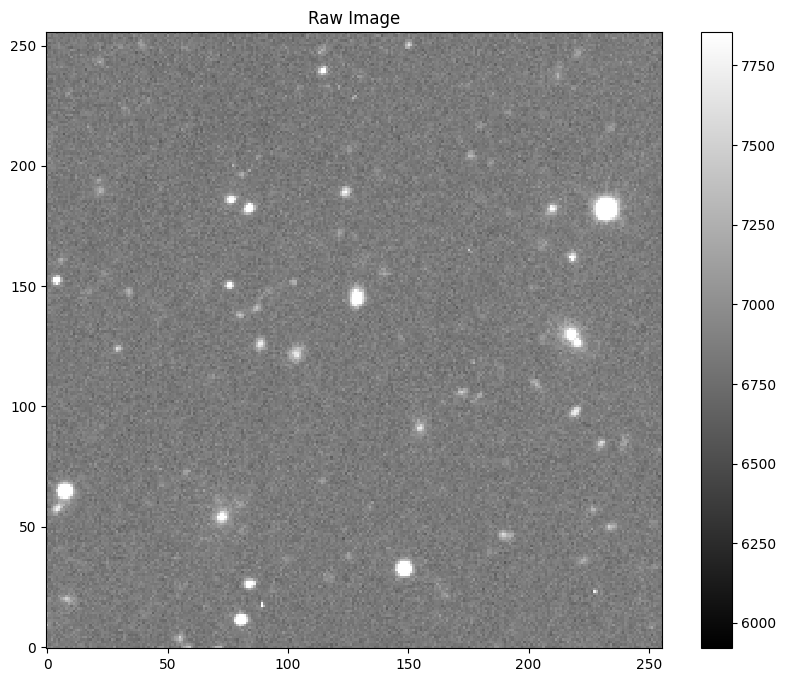

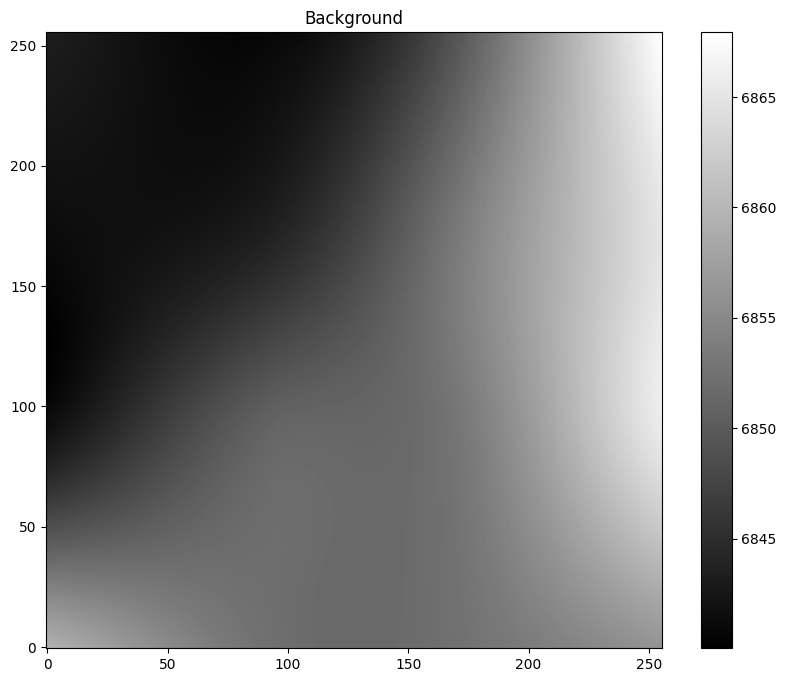

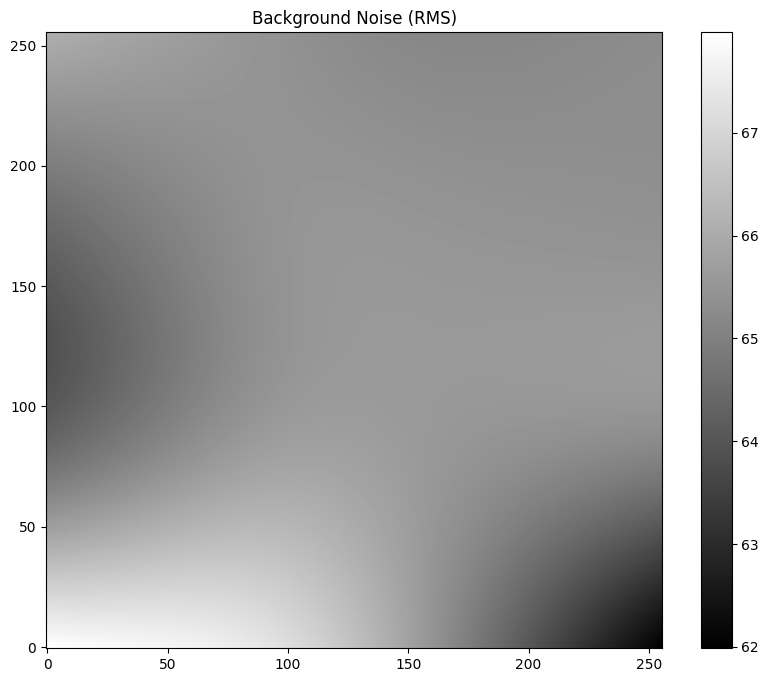

In [8]:
# --- STEP 1: VISUALIZE RAW DATA ---
# Calculate mean and standard deviation to scale the image brightness automatically
m, s = np.mean(data), np.std(data)

# Create the plot
plt.figure(figsize=(10, 8))
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.title("Raw Image")

# INSTRUCTION STEP 4: Save the figure
plt.savefig("image_1_raw.png")
plt.show() # Show it in the notebook

# --- STEP 2: BACKGROUND SUBTRACTION ---
# Measure a spatially varying background on the image
bkg = sep.Background(data)

# VISUALIZE THE BACKGROUND (What the code thinks is "empty space")
plt.figure(figsize=(10, 8))
plt.imshow(bkg.back(), interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background")
plt.savefig("image_2_background.png") # save 2nd pic as png 
plt.show()

# VISUALIZE THE NOISE (The static/fuzziness of the background)
plt.figure(figsize=(10, 8))
plt.imshow(bkg.rms(), interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.title("Background Noise (RMS)")
plt.savefig("image_3_noise.png") # save 3d pic as png
plt.show()

# --- STEP 3: SUBTRACT BACKGROUND ---
# We subtract the background so we are only looking at the actual stars/galaxies
data_sub = data - bkg

Detected 68 objects in the image.


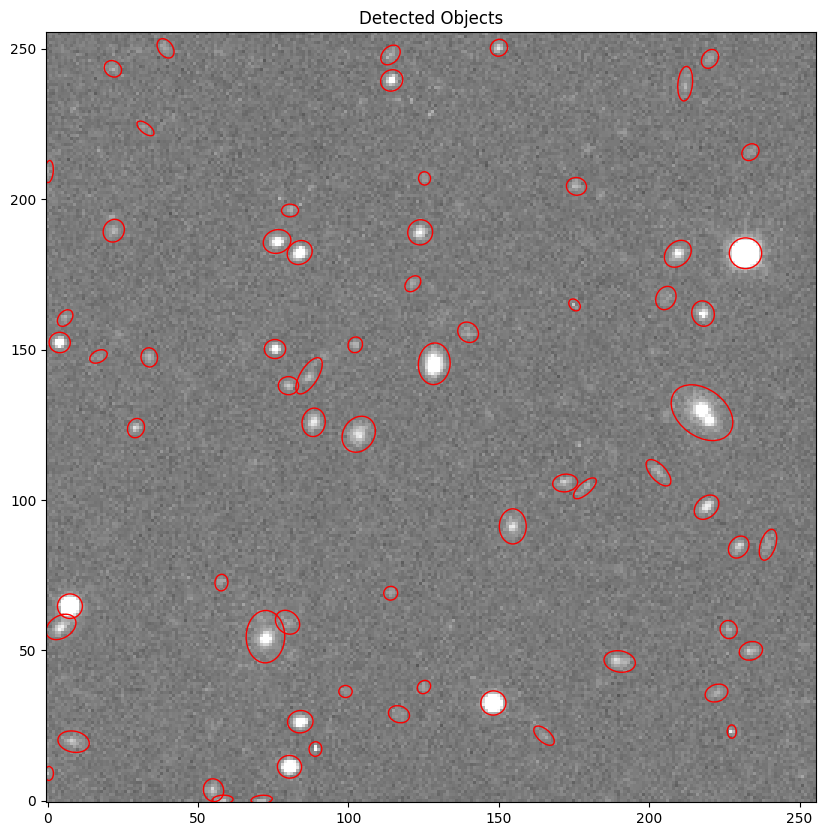

In [9]:
from matplotlib.patches import Ellipse

# --- STEP 4: DETECT OBJECTS ---
# 'thresh=1.5' means we look for pixels that are 1.5 times brighter than the background noise.
# This acts like a sensitivity dial: Lower = more false detections, Higher = misses faint stars.
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

print(f"Detected {len(objects)} objects in the image.")

# --- STEP 5: VISUALIZE DETECTIONS ---
# Plot the background-subtracted image
fig, ax = plt.subplots(figsize=(10, 10))
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# Loop through each detected object and draw a red ellipse around it
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_patch(e)

ax.set_title("Detected Objects")

# INSTRUCTION STEP 4: Save the final figure as png
plt.savefig("image_4_objects.png") 
plt.show()